In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
import seaborn as sns
import cobra
import scipy.stats as st
import scipy
sys.path.append('../code/')
import leakage

In [4]:
folder = Path('/Users/ssulheim/Library/CloudStorage/OneDrive-SINTEF/UNIL/leakage/experimental work/sintef_sept_23/exometabolome')

In [208]:
fn = folder / 'SM_Quantitative_Results.xlsx'
mapping_fn = folder / 'met_to_bigg.csv'
od_fn = folder / '..' / 'REL-F-U37-23_OD_TV.xlsx'

## Read mapping

In [120]:
mapping_dict = pd.read_csv(mapping_fn, index_col = 0).to_dict()['BiGG ID']

## Read OD and convert to biomass

In [218]:
od_df = pd.read_excel(od_fn, skiprows=2, nrows=21)
od_df.drop(index = 0, inplace=True)

In [231]:
rel_to_info = {
    'REL01': {'M': 'M1', 'CS': 'Galactose'},
    'REL02': {'M': 'M2', 'CS': 'Galactose'},
    'REL03': {'M': 'M3', 'CS': 'Galactose'},
    'REL04': {'M': 'M5', 'CS': 'L-malate'},
    'REL05': {'M': 'M6', 'CS': 'L-malate'},
    'REL06': {'M': 'M7', 'CS': 'L-malate'},
    'REL07': {'M': 'M9', 'CS': 'L-alanine'},
    'REL08': {'M': 'M10', 'CS': 'L-alanine'},
    'REL09': {'M': 'M11', 'CS': 'L-alanine'}
    }
M_to_rel = {dic['M']:rel for rel, dic in rel_to_info.items()}


In [228]:
od_df.rename(columns={'Unnamed: 0': 'Timestamp', 'Unnamed: 1': 'Time', 'Unnamed: 2': 'Hours'}, inplace=True)

In [232]:
od_df

,Timestamp,Time,Hours,REL01,REL02,REL03,REL04,REL05,REL06,REL07,REL08,REL09
1,2023-09-13 00:00:00,09:00:00,0,0.044,0.044,0.015,0.046,0.041,0.029,0.034,0.036,0.019
2,2023-09-13 00:00:00,11:00:00,2.0,0.09,0.09,0.07,0.09,0.07,0.08,0.05,0.05,0.05
3,2023-09-13 00:00:00,13:00:00,4.0,0.17,0.17,0.12,0.17,0.11,0.14,0.08,0.08,0.07
4,2023-09-13 00:00:00,15:00:00,6,0.31,0.32,0.2,0.36,0.26,0.28,0.11,0.12,0.11
5,2023-09-13 00:00:00,17:00:00,8.0,0.58,0.58,0.45,0.87,0.56,0.58,0.16,0.16,0.15
6,2023-09-13 00:00:00,18:15:00,9.25,NaN,NaN,NaN,1.6,1.1,1.2,NaN,NaN,NaN
7,2023-09-13 00:00:00,19:00:00,10.0,1.14,1.04,0.65,2.19,1.52,1.82,0.24,0.23,0.22
8,2023-09-13 00:00:00,20:00:00,11.0,1.26,1.27,0.8,2.75,2.15,2.41,0.29,0.29,0.29
9,2023-09-13 00:00:00,21:00:00,12,1.63,1.6,0.94,2.57,2.35,2.72,0.34,0.33,0.32
10,2023-09-13 00:00:00,22:00:00,13,2.17,2,1.194,2.4,2.407,2.509,NaN,NaN,NaN


## Read exometabolome

In [631]:
df = pd.read_excel(fn)

In [632]:
df.drop(index = 0, inplace=True)

In [633]:
data_columns = ['SEBACOYL-L-CARNITINE (C10-DC) ', 'DEOXYCARNITINE (DEOXY-C0) ',
       'GLUTARYLCARNITINE (C5-DC) ', 'PHENYLALANINE ', 'LEUCINE ',
       'ISOLEUCINE ', 'METHIONINE ', 'GAMMA-AMINOBUTYRATE ', 'PROLINE ',
       'TYROSINE ', 'VALINE ', 'PIPECOLIC ACID ', 'ALPHA-AMINOBUTYRATE ',
       'BETA-ALANINE ', 'ALANINE ', 'CREATINE ', 'ALPHA-AMINOADIPATE ',
       'GLYCINE ', 'GLUTAMINE ', 'GLUTAMATE ', 'SERINE ', 'ASPARAGINE ',
       'ASPARTATE ', 'LYSINE ', 'PYRUVATE ', 'LACTATE ',
       'HEXOSES including Glucose and Fructose ', 'NAD ', 'GLUTARATE ',
       'SUCCINATE ', 'MALATE ', 'CIS-ACONITATE ', 'CITRATE ', 'ISOCITRATE ',
       'TRANS-ACONITATE ']
control_samples = ['\xa0 M9 Alanine_001', 'M9 Alanine_002', '\xa0\xa0 M9 Alanine_003',
       ' M9 Galactose_001', ' M9 Galactose_002', ' M9 Galactose_003',
       'M9 malate_001', 'M9 malate_002', 'M9 malate_003']

In [634]:
control_idx = df['USER CODE'].isin(control_samples)

## Outliers in medium measurements

In [678]:
df.loc[39, ['SUCCINATE', 'MALATE']] = 'ND'

## Read medium values

In [679]:
control_df = df.loc[control_idx,:].copy()
# control_df.fillna(0, inplace = True)
control_df.replace('ND', np.nan, inplace=True)
medium_dict = control_df.groupby('Class 1').mean().to_dict(orient = 'index')


/var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/ipykernel_98750/3662467098.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medium_dict = control_df.groupby('Class 1').mean().to_dict(orient = 'index')


In [680]:
control_df = control_df[['Class 1']+data_columns]

In [681]:
dfl = df.loc[~control_idx,:].melt(id_vars=['Sample_ID', 'USER CODE', 'Class 1', 'Class 2'], value_vars=data_columns, value_name='Concentration', var_name = 'Metabolite')

In [682]:
dfl.replace('ND', np.nan, inplace=True)

In [683]:
dfl

,Sample_ID,USER CODE,Class 1,Class 2,Metabolite,Concentration
0,SM_MPTA_112023_28_Galactose-T6_M1_1,#28: Galactose-T6 M1,Galactose,T1,SEBACOYL-L-CARNITINE (C10-DC),0.065404
1,SM_MPTA_112023_29_Galactose-T6_M2_2,#29: Galactose-T6 M2,Galactose,T1,SEBACOYL-L-CARNITINE (C10-DC),0.053257
2,SM_MPTA_112023_39_Galactose-T8_M3_3,#39: Galactose-T8 M3,Galactose,T1,SEBACOYL-L-CARNITINE (C10-DC),0.064167
3,SM_MPTA_112023_55_Galactose-T12_M1_4,#55: Galactose-T12 M1,Galactose,T2,SEBACOYL-L-CARNITINE (C10-DC),0.101295
4,SM_MPTA_112023_56_Galactose-T12_M2_5,#56: Galactose-T12 M2,Galactose,T2,SEBACOYL-L-CARNITINE (C10-DC),0.050101
...,...,...,...,...,...,...
1255,SM_MPTA_112023_89_L-alanine-T18_M10_32,#89: L-alanine-T18 M10,L-alanine,T3,TRANS-ACONITATE,0.037280
1256,SM_MPTA_112023_90_L-alanine-T18_M11_33,#90: L-alanine-T18 M11,L-alanine,T3,TRANS-ACONITATE,0.034082
1257,SM_MPTA_112023_106_L-alanine-T22_M9_34,#106: L-alanine-T22 M9,L-alanine,T4,TRANS-ACONITATE,0.065599
1258,SM_MPTA_112023_107_L-alanine-T22_M10_35,#107: L-alanine-T22 M10,L-alanine,T4,TRANS-ACONITATE,0.001801


In [684]:
dfl['Hours'] = [int(x[1].split('-T')[-1]) for x in dfl['USER CODE'].str.split(' ')]

In [685]:
dfl['Timepoint'] = dfl['Class 2'].str.strip('T').astype(int)

In [686]:
dfl.loc[dfl.Timepoint != 4,:]

,Sample_ID,USER CODE,Class 1,Class 2,Metabolite,Concentration,Hours,Timepoint
0,SM_MPTA_112023_28_Galactose-T6_M1_1,#28: Galactose-T6 M1,Galactose,T1,SEBACOYL-L-CARNITINE (C10-DC),0.065404,6,1
1,SM_MPTA_112023_29_Galactose-T6_M2_2,#29: Galactose-T6 M2,Galactose,T1,SEBACOYL-L-CARNITINE (C10-DC),0.053257,6,1
2,SM_MPTA_112023_39_Galactose-T8_M3_3,#39: Galactose-T8 M3,Galactose,T1,SEBACOYL-L-CARNITINE (C10-DC),0.064167,8,1
3,SM_MPTA_112023_55_Galactose-T12_M1_4,#55: Galactose-T12 M1,Galactose,T2,SEBACOYL-L-CARNITINE (C10-DC),0.101295,12,2
4,SM_MPTA_112023_56_Galactose-T12_M2_5,#56: Galactose-T12 M2,Galactose,T2,SEBACOYL-L-CARNITINE (C10-DC),0.050101,12,2
...,...,...,...,...,...,...,...,...
1252,SM_MPTA_112023_80_L-alanine-T16_M10_29,#80: L-alanine-T16 M10,L-alanine,T2,TRANS-ACONITATE,0.014432,16,2
1253,SM_MPTA_112023_81_L-alanine-T16_M11_30,#81: L-alanine-T16 M11,L-alanine,T2,TRANS-ACONITATE,0.016281,16,2
1254,SM_MPTA_112023_88_L-alanine-T18_M9_31,#88: L-alanine-T18 M9,L-alanine,T3,TRANS-ACONITATE,0.043767,18,3
1255,SM_MPTA_112023_89_L-alanine-T18_M10_32,#89: L-alanine-T18 M10,L-alanine,T3,TRANS-ACONITATE,0.037280,18,3


/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


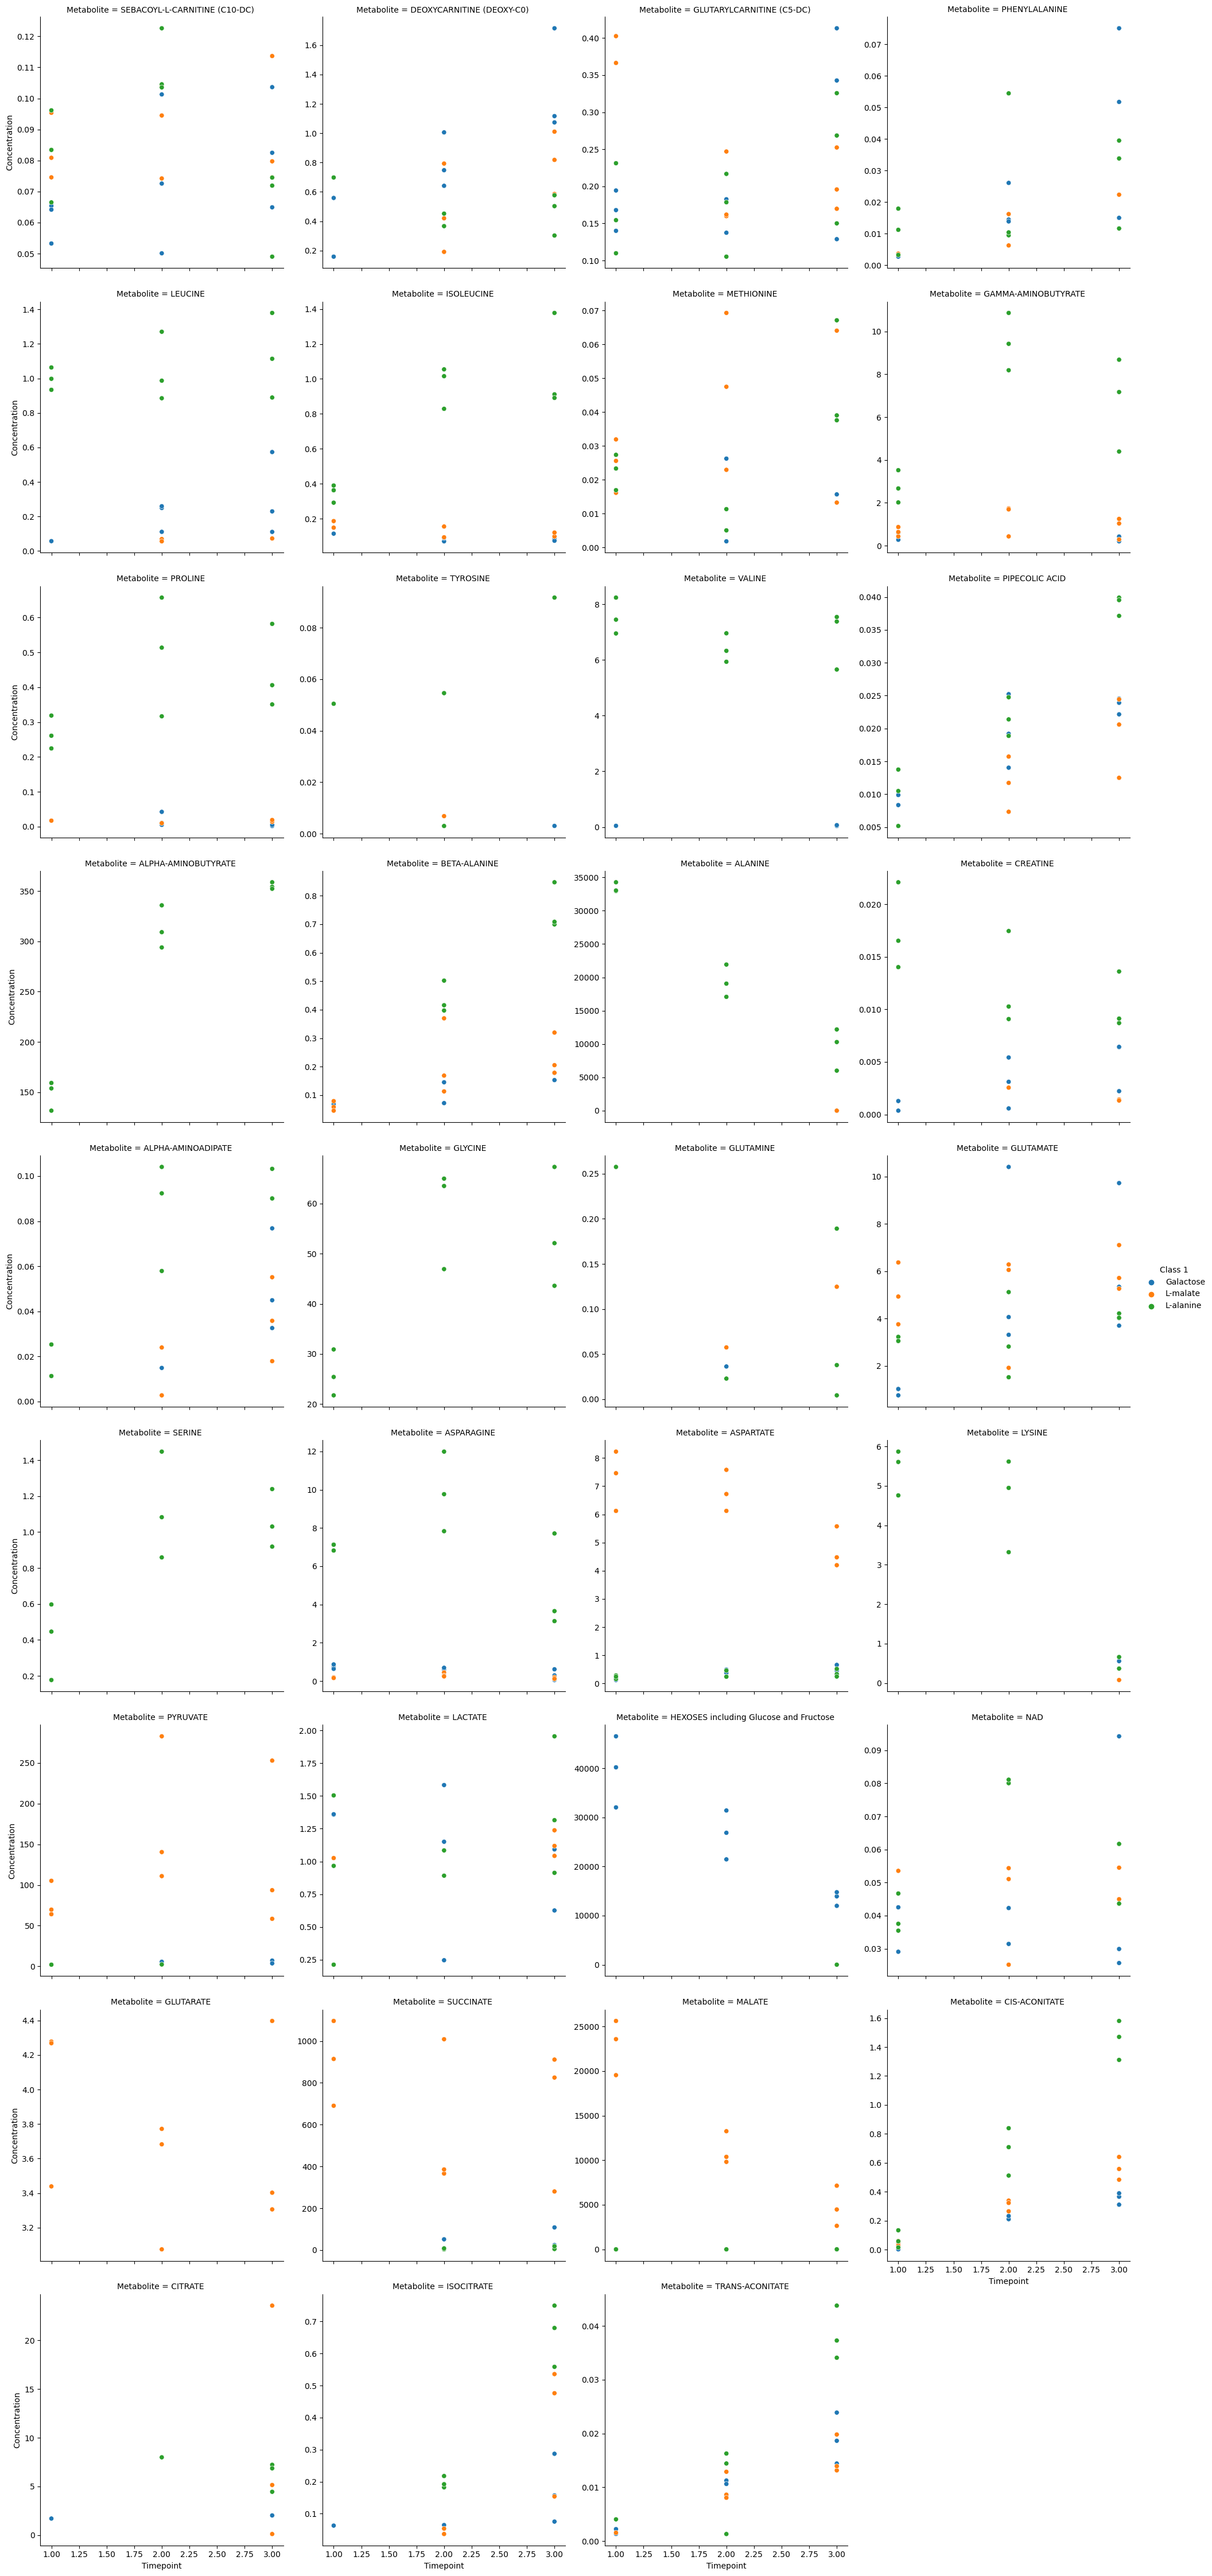

In [687]:
sns.relplot(data = dfl.loc[dfl.Timepoint != 4,:], x = 'Timepoint', y = 'Concentration', hue = 'Class 1', col = 'Metabolite', col_wrap=4, facet_kws={'sharey': False})
plt.show()

# Estimate rates


In [688]:
dfl['Carbon source'] = dfl['Class 1']
dfl['M'] = [x[-1] for x in dfl['USER CODE'].str.split(' ')]

In [689]:
od_df

,Timestamp,Time,Hours,REL01,REL02,REL03,REL04,REL05,REL06,REL07,REL08,REL09
1,2023-09-13 00:00:00,09:00:00,0,0.044,0.044,0.015,0.046,0.041,0.029,0.034,0.036,0.019
2,2023-09-13 00:00:00,11:00:00,2.0,0.09,0.09,0.07,0.09,0.07,0.08,0.05,0.05,0.05
3,2023-09-13 00:00:00,13:00:00,4.0,0.17,0.17,0.12,0.17,0.11,0.14,0.08,0.08,0.07
4,2023-09-13 00:00:00,15:00:00,6,0.31,0.32,0.2,0.36,0.26,0.28,0.11,0.12,0.11
5,2023-09-13 00:00:00,17:00:00,8.0,0.58,0.58,0.45,0.87,0.56,0.58,0.16,0.16,0.15
6,2023-09-13 00:00:00,18:15:00,9.25,NaN,NaN,NaN,1.6,1.1,1.2,NaN,NaN,NaN
7,2023-09-13 00:00:00,19:00:00,10.0,1.14,1.04,0.65,2.19,1.52,1.82,0.24,0.23,0.22
8,2023-09-13 00:00:00,20:00:00,11.0,1.26,1.27,0.8,2.75,2.15,2.41,0.29,0.29,0.29
9,2023-09-13 00:00:00,21:00:00,12,1.63,1.6,0.94,2.57,2.35,2.72,0.34,0.33,0.32
10,2023-09-13 00:00:00,22:00:00,13,2.17,2,1.194,2.4,2.407,2.509,NaN,NaN,NaN


In [690]:
np.isfinite(medium_values).sum()

1

# Estimate rate per bioreactor

In [691]:
data = []
plot = False
data_rate = []
for m in dfl.M.unique():
    # if not m in ['M5', 'M6', 'M7']:
    #     continue
    for met in dfl.Metabolite.unique():
        # print(met, m)
        idx = (dfl.M == m) & (dfl.Metabolite == met) & (dfl.Timepoint != 4)
        dfi = dfl.loc[idx,['Concentration', 'Hours', 'Carbon source', 'Timepoint']].copy()
        # print(m, met)
        # print(dfi)
        dfi.dropna(axis = 0, inplace=True)
    
        if not len(dfi):
            continue
        cs = dfi['Carbon source'].values[0]  
        # if len(dfi) == 1:
        # Add medium concentrations
        medium_values = control_df.loc[control_df['Class 1']==cs, met].values
        if np.isfinite(medium_values).sum() == 0:
            dfi.loc[-1,:] = [0, 0, cs, 0]
        else:
            dfi.loc[-1,:] = [np.nanmean(medium_values), 0, cs, 0]
        if (2 in dfi.Timepoint.values) and (3 in dfi.Timepoint.values):
            t3_value = dfi.loc[dfi.Timepoint == 3, 'Concentration'].values[0]
            t2_value = dfi.loc[dfi.Timepoint == 2, 'Concentration'].values[0]
            if  t3_value < t2_value:
                # Indicates that the matbolite is being reconsumed, discard last point from estimating rates
                # And compensate by adding time 0
                dfi = dfi.loc[dfi.Timepoint != 3, :]
                # dfi.loc[-1,:] = [medium_dict[cs][met], 0, cs, 0]
        
            # The maximum value 
        # print(dfi)
        time_conc_dict = {key: (value['Hours'], value['Concentration']) for key, value in dfi[['Hours', 'Concentration']].to_dict(orient = 'index').items()}
        max_time = max(list(time_conc_dict.keys()))
        rel = M_to_rel[m]
        OD = od_df[['Hours', rel]].copy()
        OD.dropna(inplace=True)
        m_data = []
        for index, val_tuple in time_conc_dict.items():
            time, conc = val_tuple
            # Calculate cumulative OD
            tidx = OD.Hours < time+0.5

            cum_OD = scipy.integrate.simpson(OD.loc[tidx, rel], OD.loc[tidx, 'Hours'])
            data.append([m, met, time, conc, cum_OD, cs])
            m_data.append([conc, cum_OD])

        m_df = pd.DataFrame(m_data, columns = ['Concentration', 'Cumulative OD'])
        popt, pcov = scipy.optimize.curve_fit(lambda x,a,b: a*x+b, m_df['Cumulative OD'], m_df['Concentration'])
        rate = popt[0]
        data_rate.append([m, met, cs, rate, pcov[0,0]])
        if plot:
            print(m, met)
            plt.scatter(m_df['Cumulative OD'], m_df['Concentration'])
            x = np.linspace(0,max_time, 4)
            plt.plot(x, rate*x + popt[1])
            plt.show()
df_conc_biomass = pd.DataFrame(data, columns = ['M', 'Metabolite', 'Time', 'Concentration', 'Cumulative OD', 'Carbon source'])
df_rate = pd.DataFrame(data_rate, columns = ['M', 'Metabolite', 'Carbon source', 'Rate', 'Rate var'])

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_p

In [ ]:
average_rate_data = []
for cs in df_conc_biomass['Carbon source'].unique():
    for m in df_conc_biomass.Metabolite.unique():
        idx = (df_conc_biomass['Carbon source'] == cs) & (df_conc_biomass.Metabolite==m)
        if len( df_conc_biomass.loc[idx, 'Concentration']) > 3:
            print(cs, m)
            sns.scatterplot(data = df_conc_biomass.loc[idx,:], x = 'Cumulative OD', y = 'Concentration', hue = 'M')
            plt.show()
            popt, pcov = scipy.optimize.curve_fit(lambda x,a,b: (a*x)+b, df_conc_biomass.loc[idx, 'Cumulative OD'], df_conc_biomass.loc[idx, 'Concentration'])
            perr = np.sqrt(np.diag(pcov))
            average_rate_data.append([cs, m, popt[0], perr[0]])
average_rate_df = pd.DataFrame(average_rate_data, columns = ['Carbon source', 'Metabolite', 'Rate', 'Rate std'])

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


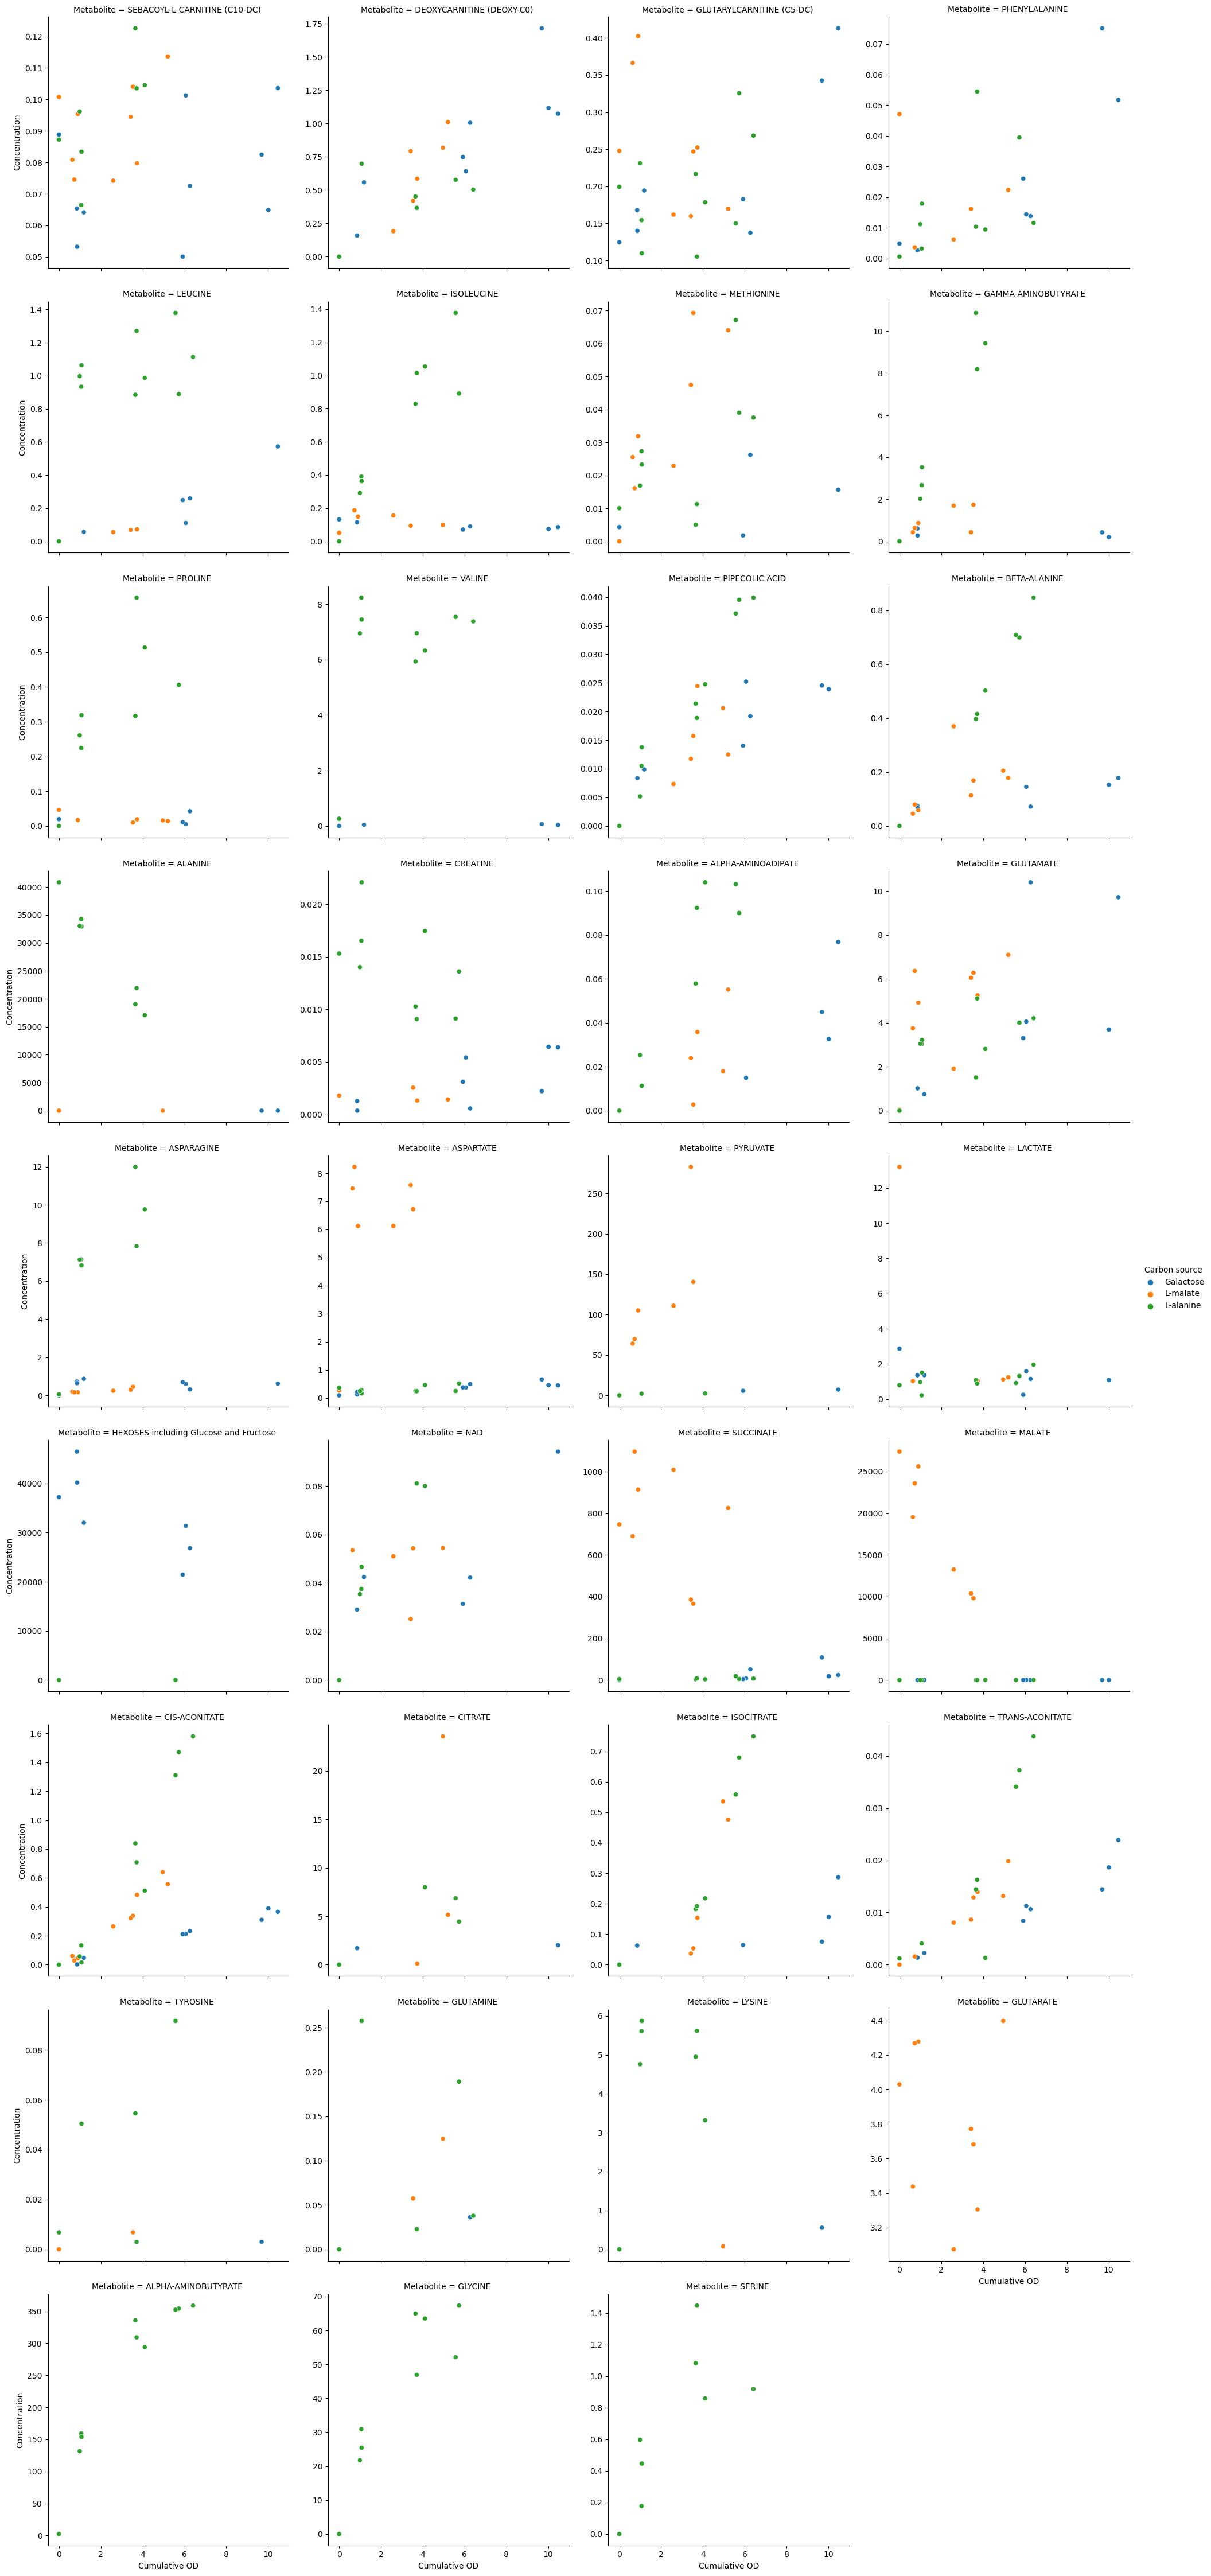

In [693]:
sns.relplot(data = df_conc_biomass, x = 'Cumulative OD', y = 'Concentration', col = 'Metabolite', col_wrap=4, facet_kws={'sharey': False}, hue = 'Carbon source')
plt.show()

In [694]:
model_ez = cobra.io.read_sbml_model('../models/e_coli/momentiJO1366.xml')
model_ez.id = 'moment-iJO1366'
model_ez.solver = 'gurobi'
model_ez.reactions.EX_glc__D_e.lower_bound = 0


In [695]:
cs_to_exchange = {
    'Galactose': 'EX_gal_e',
    'L-malate': 'EX_mal__L_e',
    'L-alanine': 'EX_ala__L_e'
}

In [696]:
measured_metabolite_ids = [f'{m_id}_c' for m_id in mapping_dict.values() if isinstance(m_id, str)]

In [715]:
uptake_rate = 5
sp_dict = {}
for cs, ex_id in cs_to_exchange.items():
    with model_ez as model:
        r_ex = model.reactions.get_by_id(ex_id)
        r_ex.lower_bound = - uptake_rate
        sp_dict[cs] = leakage.estimate_shadow_prices(model, delta = 0.01, metabolites=measured_metabolite_ids)
        

In [716]:
mv_df = pd.DataFrame(sp_dict)*-1

In [717]:
sp_dict[cs]

{'cit_c': -0.07364905748754036,
 'fru_c': -0.11317910855183633,
 'icit_c': -0.0736506611893728,
 'lac__L_c': -0.051406918676299984,
 'glu__L_c': -0.07314686997257625,
 'mal__L_c': -0.05029928280887719,
 'nad_c': -0.3943852335544784,
 'succ_c': -0.05382021847452623,
 'acon_T_c': -0.0735710908584375,
 'asn__L_c': -0.053830572860957826,
 'asp__L_c': -0.04960785103874654,
 'ala_B_c': -0.048570687499299714,
 '4abut_c': -0.07144710752011174,
 'gln__L_c': -0.07664139971866324,
 'gly_c': -0.026837751151029265,
 'ile__L_c': -0.12344046505282091,
 'leu__L_c': -0.11214226043359532,
 'lys__L_c': -0.11613781603928286,
 'met__L_c': -0.1506452330171021,
 'phe__L_c': -0.18617572533934923,
 'pro__L_c': -0.09015445877408323,
 'ser__L_c': -0.0455134369790583,
 'tyr__L_c': -0.17890123455975293,
 'val__L_c': -0.08914732433976391,
 'ala__L_c': -0.04573103148336477,
 'pyr_c': -0.03849097349463981}

In [760]:
data = []
Nc = []
for _, row in df_rate.iterrows():
    cs = row['Carbon source']
    met = row['Metabolite']
    bigg_id = mapping_dict[met]
    if isinstance(bigg_id, str):
        data.append(-sp_dict[cs][f'{bigg_id}_c'])

        m = model_ez.metabolites.get_by_id(f'{bigg_id}_c')
        Nc.append(m.elements['C'])
    else:
        data.append(np.nan)
        Nc.append(np.nan)
    
        
df_rate['Metabolite value'] = data
df_rate['N carbons'] = Nc

In [775]:
df_rate['C-normalized rate'] = df_rate['Rate']*df_rate['N carbons']
df_rate['C-normalized MV'] = df_rate['Metabolite value']/df_rate['N carbons']

In [776]:
df_rate['log10(rate)'] = np.log10(df_rate['Rate'])
df_rate['log10(MV)'] = np.log10(df_rate['Metabolite value'])
df_rate['log10(C-rate)'] = np.log10(df_rate['C-normalized rate'])
df_rate['log10(C-MV)'] = np.log10(df_rate['C-normalized MV'])

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [777]:
#### DEPRECATED
# This does not make sense and gives very noisy data
# data = []
# for _, row in average_rate_df.iterrows():
#     cs = row['Carbon source']
#     met = row['Metabolite']
#     bigg_id = mapping_dict[met]
#     if isinstance(bigg_id, str):
#         data.append(-sp_dict[cs][f'{bigg_id}_c'])
#     else:
#         data.append(np.nan)
        
# average_rate_df['Metabolite value'] = data

In [778]:
# average_rate_df['log10(rate)'] = np.log10(average_rate_df['Rate'])
# average_rate_df['log10(MV)'] = np.log10(average_rate_df['Metabolite value'])

In [779]:
df_rate

,M,Metabolite,Carbon source,Rate,Rate var,Metabolite value,log10(rate),log10(MV),N carbons,C-normalized rate,C-normalized MV,log10(C-rate),log10(C-MV)
0,M1,SEBACOYL-L-CARNITINE (C10-DC),Galactose,0.002710,0.000003,NaN,-2.567083,NaN,NaN,NaN,NaN,NaN,NaN
1,M1,DEOXYCARNITINE (DEOXY-C0),Galactose,0.099654,0.000019,NaN,-1.001504,NaN,NaN,NaN,NaN,NaN,NaN
2,M1,GLUTARYLCARNITINE (C5-DC),Galactose,0.026719,0.000003,NaN,-1.573185,NaN,NaN,NaN,NaN,NaN,NaN
3,M1,PHENYLALANINE,Galactose,0.004352,0.000001,0.118664,-2.361336,-0.925681,9.0,0.039166,0.013185,-1.407094,-1.879924
4,M1,LEUCINE,Galactose,0.052567,0.000586,0.157820,-1.279291,-0.801837,6.0,0.315399,0.026303,-0.501139,-1.579989
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,M11,MALATE,L-alanine,0.522388,0.477491,0.050299,-0.282007,-1.298438,4.0,2.089550,0.012575,0.320053,-1.900498
255,M11,CIS-ACONITATE,L-alanine,0.239871,0.000740,NaN,-0.620022,NaN,NaN,NaN,NaN,NaN,NaN
256,M11,CITRATE,L-alanine,1.230785,inf,0.073649,0.090182,-1.132833,6.0,7.384709,0.012275,0.868333,-1.910984
257,M11,ISOCITRATE,L-alanine,0.093319,0.001293,0.073651,-1.030031,-1.132823,6.0,0.559913,0.012275,-0.251880,-1.910975


In [780]:
df_rate_i1 = df_rate.dropna()
# dfmean = df_rate_i1.groupby(['Carbon source', 'Metabolite']).mean().reset_index()

In [781]:
for cs in df_rate_i1['Carbon source'].unique():
    idx = df_rate_i1['Carbon source'] == cs
    pcorr, ppval = st.pearsonr(df_rate_i1.loc[idx, 'log10(rate)'], df_rate_i1.loc[idx, 'log10(MV)'])
    scorr, spval = st.spearmanr(df_rate_i1.loc[idx, 'log10(rate)'], df_rate_i1.loc[idx, 'log10(MV)'])
    print(cs, pcorr, ppval, scorr, spval)

Galactose -0.5094270485006627 0.0002993840525455259 -0.5534562315296507 6.621266760272763e-05
L-malate -0.6168318933260676 1.3602002655467678e-05 -0.7391724931567215 2.265456471888638e-08
L-alanine -0.49560639877006174 1.491823176451154e-05 -0.41585474576053455 0.0003799385360518434


In [782]:
for cs in df_rate_i1['Carbon source'].unique():
    idx = df_rate_i1['Carbon source'] == cs
    pcorr, ppval = st.pearsonr(df_rate_i1.loc[idx, 'log10(C-rate)'], df_rate_i1.loc[idx, 'log10(C-MV)'])
    scorr, spval = st.spearmanr(df_rate_i1.loc[idx, 'log10(C-rate)'], df_rate_i1.loc[idx, 'log10(C-MV)'])
    print(cs, pcorr, ppval, scorr, spval)

Galactose -0.36411756836375603 0.012858872308503492 -0.2466805254691915 0.09839688967600375
L-malate -0.43277620817329004 0.004202339974081952 -0.43340320391812165 0.0041415978891623136
L-alanine -0.2990813004484301 0.01254623476662038 -0.19260660101060545 0.11283745071121125


In [789]:
less_than_3 = (df_rate_i1.groupby(['Carbon source', 'Metabolite'])['M'].count() < 2).to_dict()

In [784]:
df_rate_i1_mean = df_rate_i1.groupby(['Carbon source', 'Metabolite']).mean().reset_index()
df_rate_i1_mean['log10(rate)'] = np.log10(df_rate_i1_mean['Rate'])
df_rate_i1_mean['log10(MV)'] = np.log10(df_rate_i1_mean['Metabolite value'])

/var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/ipykernel_98750/2928444149.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rate_i1_mean = df_rate_i1.groupby(['Carbon source', 'Metabolite']).mean().reset_index()


In [796]:
df_rate_i1_mean_r = df_rate_i1_mean.copy()
remove = []
for i, row in df_rate_i1_mean_r.iterrows():
    if less_than_3[row['Carbon source'], row['Metabolite']]:
        remove.append(i)
df_rate_i1_mean_r.drop(index = remove, inplace=True)
print("If only counting those with rates estimated in all three parallels")
for cs in df_rate_i1_mean_r['Carbon source'].unique():
    idx = df_rate_i1_mean_r['Carbon source'] == cs
    pcorr, ppval = st.pearsonr(df_rate_i1_mean_r.loc[idx, 'log10(rate)'], df_rate_i1_mean_r.loc[idx, 'log10(MV)'])
    scorr, spval = st.spearmanr(df_rate_i1_mean_r.loc[idx, 'log10(rate)'], df_rate_i1_mean_r.loc[idx, 'log10(MV)'])
    print(cs, pcorr, ppval, scorr, spval)
    
print("If counting all estimated rates")
for cs in df_rate_i1_mean['Carbon source'].unique():
    idx = df_rate_i1_mean['Carbon source'] == cs
    pcorr, ppval = st.pearsonr(df_rate_i1_mean.loc[idx, 'log10(rate)'], df_rate_i1_mean.loc[idx, 'log10(MV)'])
    scorr, spval = st.spearmanr(df_rate_i1_mean.loc[idx, 'log10(rate)'], df_rate_i1_mean.loc[idx, 'log10(MV)'])
    print(cs, pcorr, ppval, scorr, spval)

If only counting those with rates estimated in all three parallels
Galactose -0.5925855772737385 0.019917317006066325 -0.5714285714285713 0.02606319337636288
L-alanine -0.5421013730463985 0.007536810534114782 -0.4614624505928854 0.026658682303735155
L-malate -0.6033348871995128 0.029029098307396087 -0.6978021978021978 0.008000717411226549
If counting all estimated rates
Galactose -0.5657894254078495 0.009316884030613138 -0.5804511278195488 0.0072900732244842075
L-alanine -0.4968949131319817 0.011508287584401544 -0.3923076923076923 0.05241792334601506
L-malate -0.6491830858266776 0.0048043450146171 -0.7941176470588236 0.00014087555462921763


/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


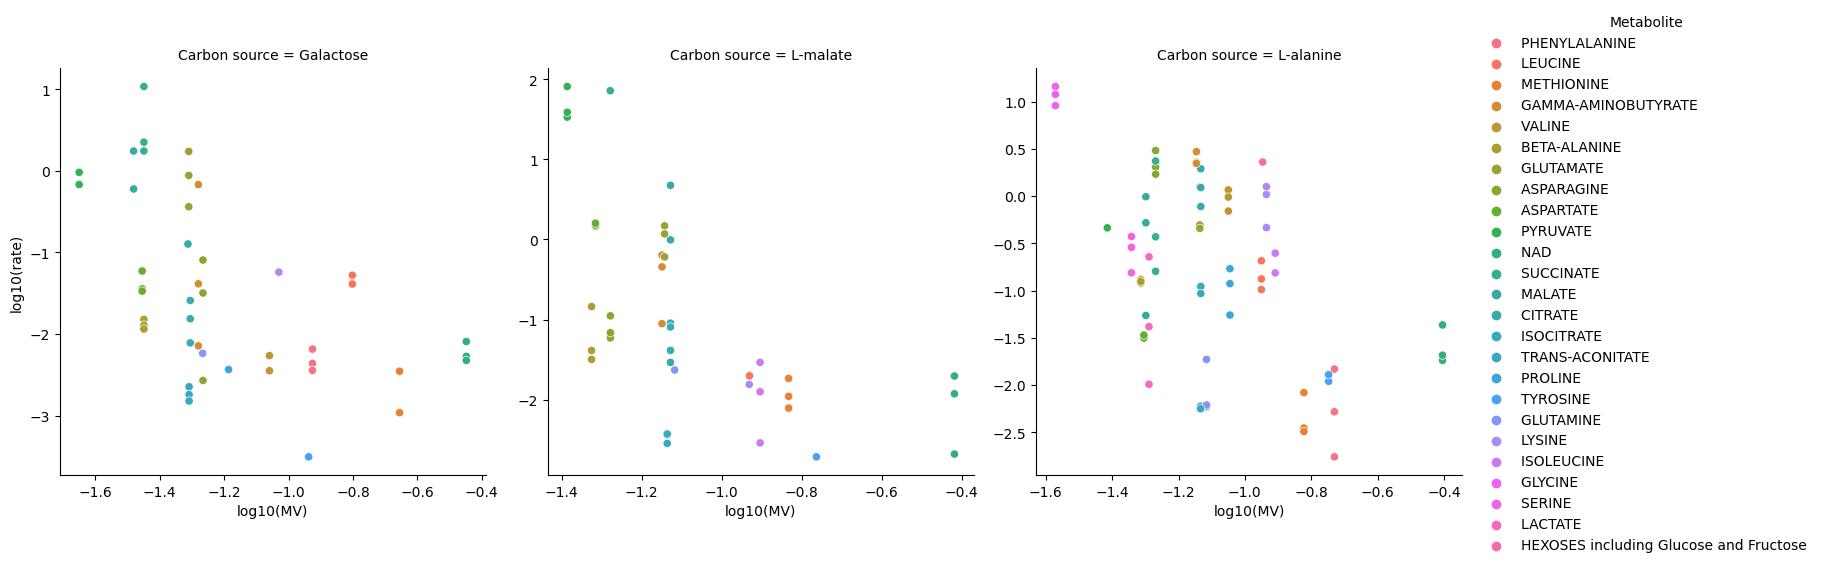

In [786]:
sns.relplot(data = df_rate_i1, y = 'log10(rate)', x = 'log10(MV)', col = 'Carbon source', facet_kws={'sharey': False, 'sharex': False}, hue = 'Metabolite')#
plt.show()

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


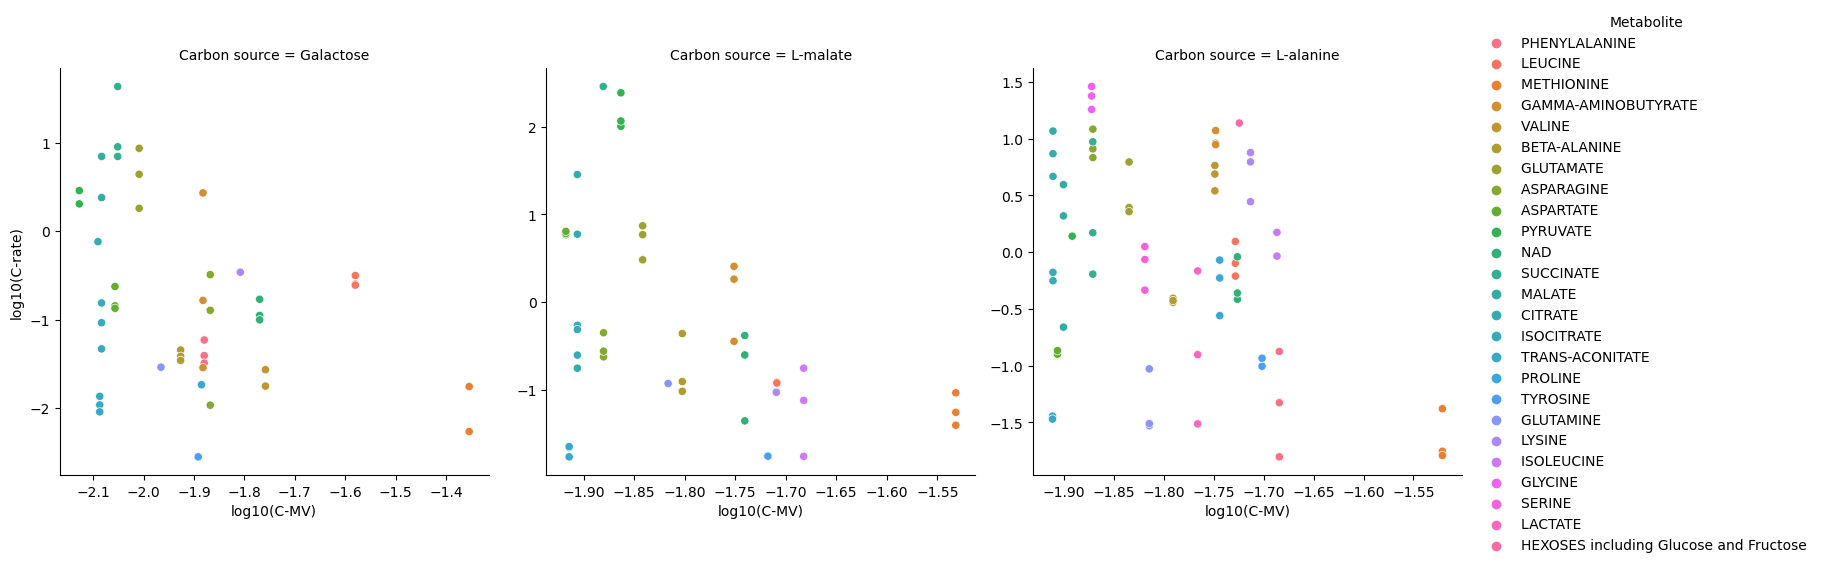

In [787]:
sns.relplot(data = df_rate_i1, y = 'log10(C-rate)', x = 'log10(C-MV)', col = 'Carbon source', facet_kws={'sharey': False, 'sharex': False}, hue = 'Metabolite')#
plt.show()

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


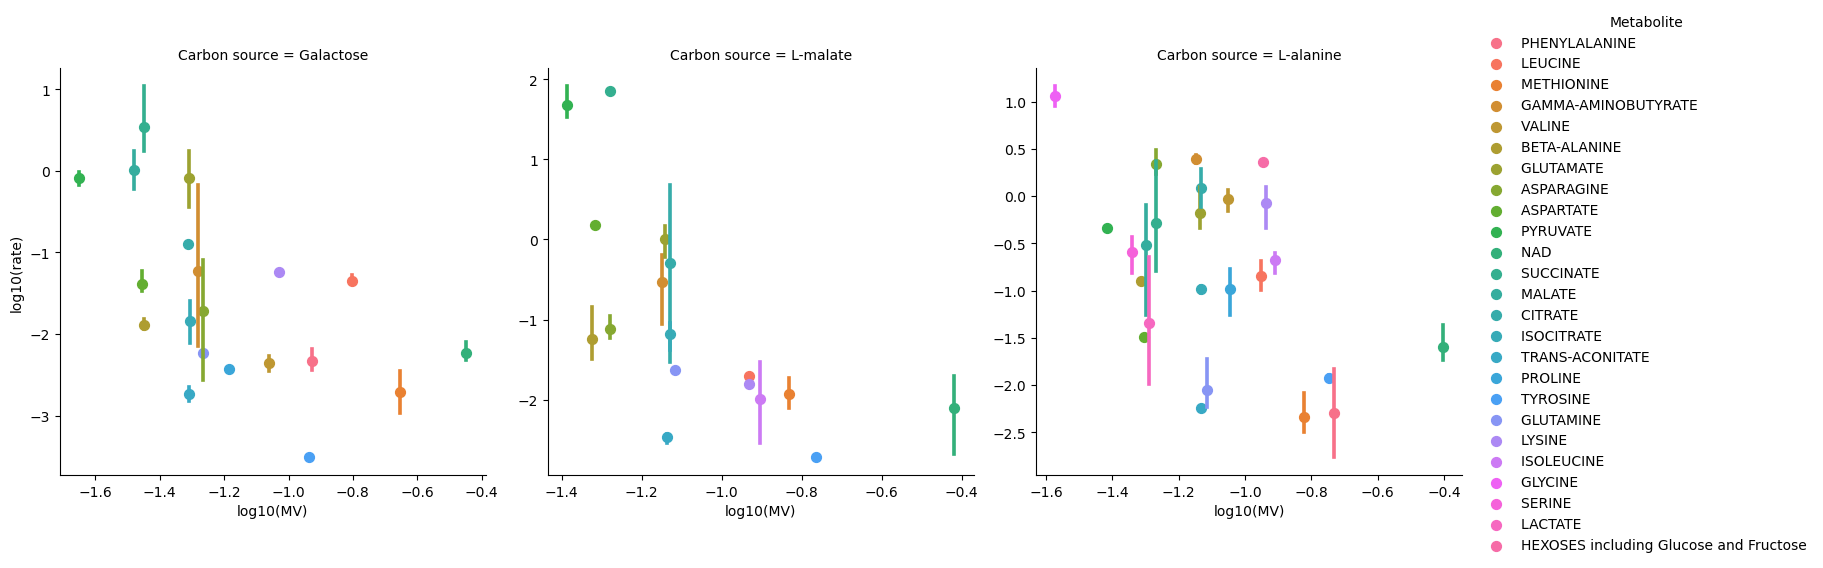

In [788]:
sns.lmplot(data = df_rate_i1, y = 'log10(rate)', x = 'log10(MV)', col = 'Carbon source', facet_kws={'sharey': False, 'sharex': False}, hue = 'Metabolite', x_estimator=np.mean)#
plt.show()

In [728]:
df_rate_i = average_rate_df.dropna()


In [709]:
df_rate_i.loc[df_rate_i['Carbon source'] == 'L-malate'].sort_values('Rate')

,Carbon source,Metabolite,Rate,Rate std,Metabolite value,log10(rate),log10(MV)
51,L-malate,TRANS-ACONITATE,0.003335,0.000307,0.070581,-2.476858,-1.151312
32,L-malate,ISOLEUCINE,0.006784,0.011343,0.122874,-2.168526,-0.910539
45,L-malate,NAD,0.009663,0.003805,0.388625,-2.014877,-0.410469
33,L-malate,METHIONINE,0.012511,0.002122,0.156318,-1.902720,-0.805992
31,L-malate,LEUCINE,0.019997,0.000716,0.124916,-1.699043,-0.903383
37,L-malate,BETA-ALANINE,0.039416,0.013458,0.046645,-1.404333,-1.331191
50,L-malate,ISOCITRATE,0.077537,0.024837,0.070643,-1.110490,-1.150931
41,L-malate,ASPARAGINE,0.083044,0.012958,0.054079,-1.080690,-1.266973
34,L-malate,GAMMA-AMINOBUTYRATE,0.345390,0.116981,0.069318,-0.461690,-1.159151
40,L-malate,GLUTAMATE,1.075667,0.350295,0.069672,0.031678,-1.156944


In [710]:
for cs in df_rate_i['Carbon source'].unique():
    idx = df_rate_i['Carbon source'] == cs
    pcorr, ppval = st.pearsonr(df_rate_i.loc[idx, 'log10(rate)'], df_rate_i.loc[idx, 'log10(MV)'])
    scorr, spval = st.spearmanr(df_rate_i.loc[idx, 'log10(rate)'], df_rate_i.loc[idx, 'log10(MV)'])
    print(cs, pcorr, ppval, scorr, spval)

Galactose -0.4939146742890016 0.05183452454021168 -0.5941176470588235 0.015232400876327998
L-malate -0.6059119863030676 0.02816880990204009 -0.6868131868131868 0.009509496050393583
L-alanine -0.42200836424837174 0.044873958690841764 -0.3883399209486166 0.06707292330368862


/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


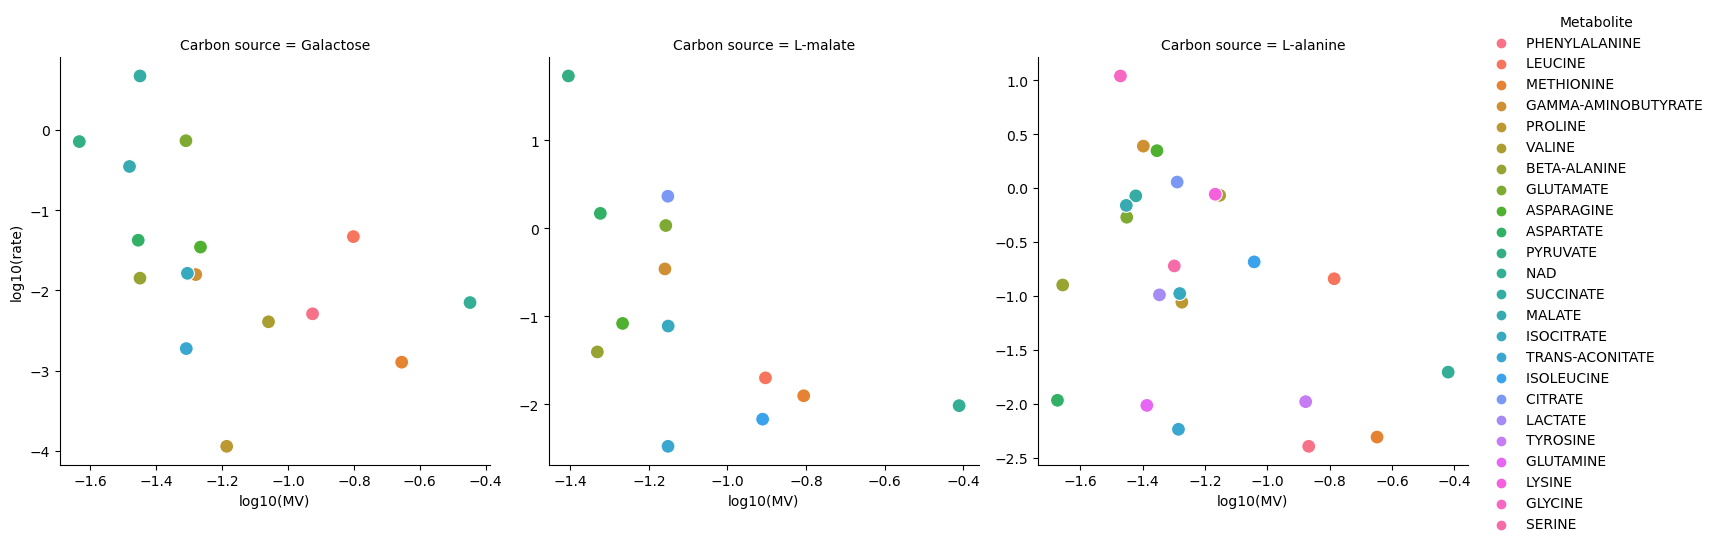

In [711]:
sns.relplot(data = df_rate_i, y = 'log10(rate)', x = 'log10(MV)', col = 'Carbon source', facet_kws={'sharey': False, 'sharex': False}, hue = 'Metabolite', s = 100)#
plt.show()

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


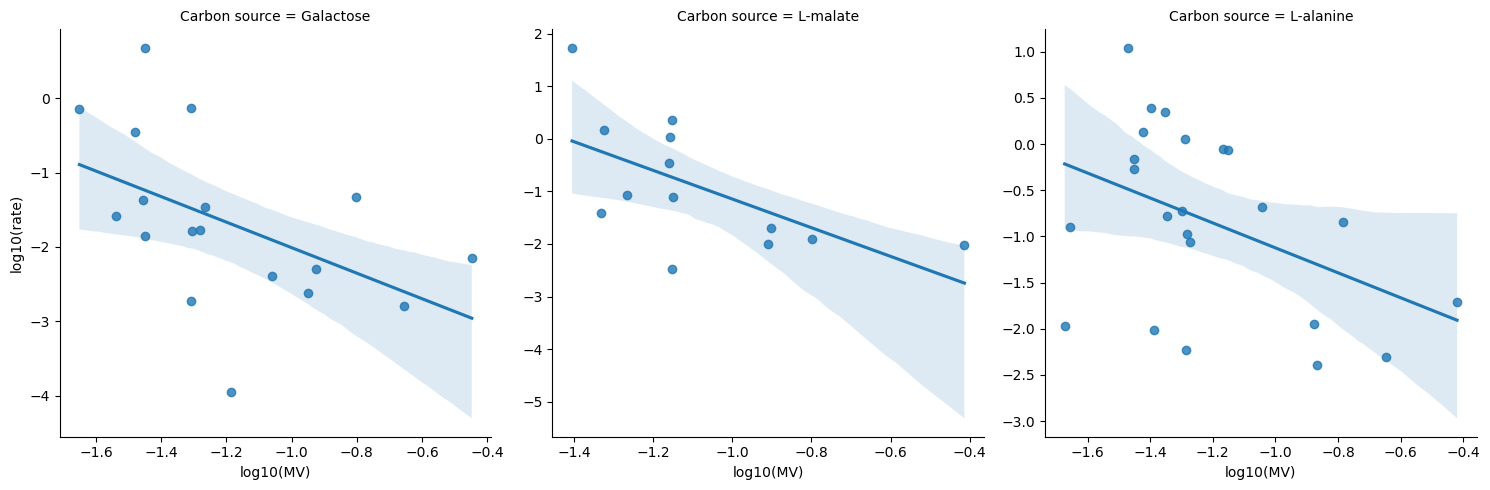

In [572]:
sns.lmplot(data = df_rate_i, y = 'log10(rate)', x = 'log10(MV)', col = 'Carbon source', facet_kws={'sharey': False, 'sharex': False})#
plt.show()

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


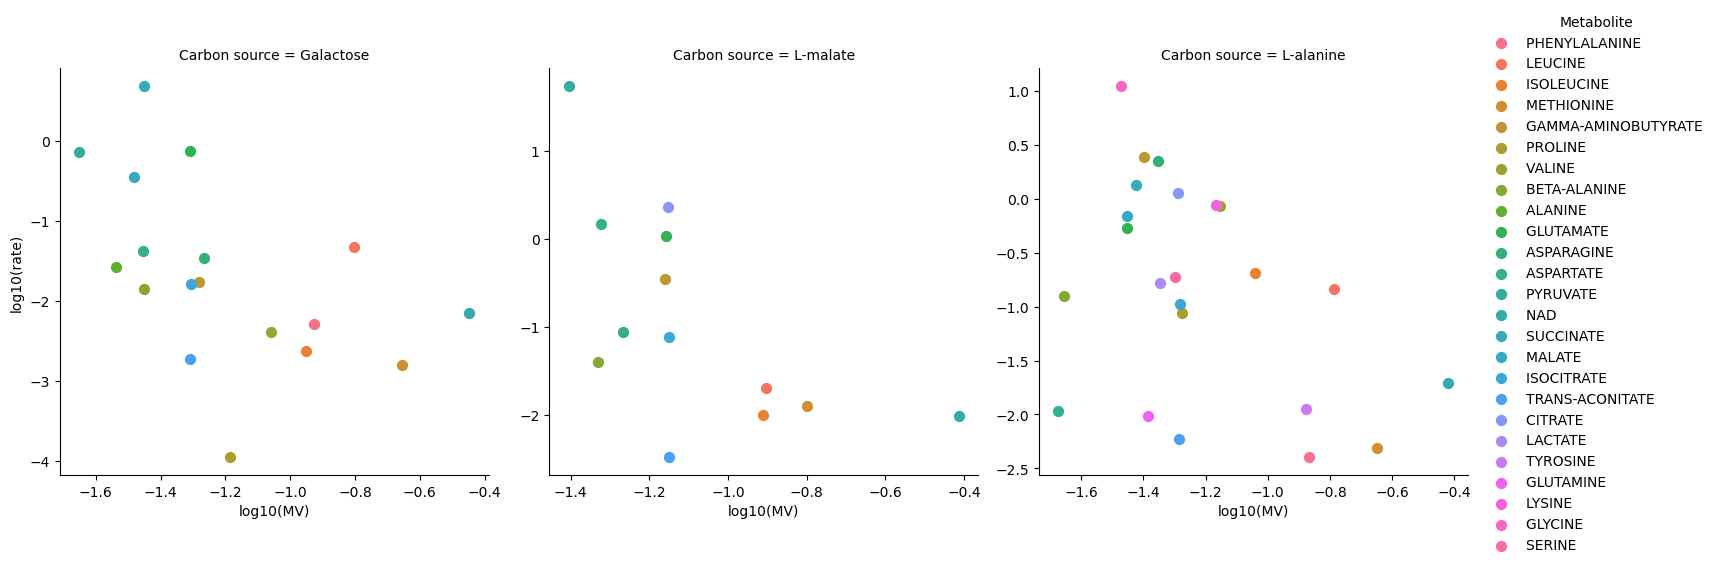

In [574]:
sns.lmplot(data = df_rate_i, y = 'log10(rate)', x = 'log10(MV)', col = 'Carbon source', facet_kws={'sharey': False, 'sharex': False}, hue = 'Metabolite')#
plt.show()

In [145]:
data = []
carbon_source = 'L-malate'
timepoint = 'T3'
for met, bigg_id in mapping_dict.items():
    if not isinstance(bigg_id, str):
        continue
    idx = (dfl['Class 1'] == carbon_source) & (dfl['Metabolite'] == met) & (dfl.Timepoint == 3)

    conc = dfl.loc[idx, 'Concentration'].values
    for x in conc:
        if not np.isnan(x):
            data.append([met,x, metabolite_values[f'{bigg_id}_c']])

In [146]:
dfi = pd.DataFrame(data, columns = ['Metabolite', 'Concentration', 'Metabolite value'])

In [156]:
dfi['log10(Concentration)'] = np.log10(dfi['Concentration'])
dfi['log10(mv)'] = np.log10(dfi['Metabolite value'])


/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


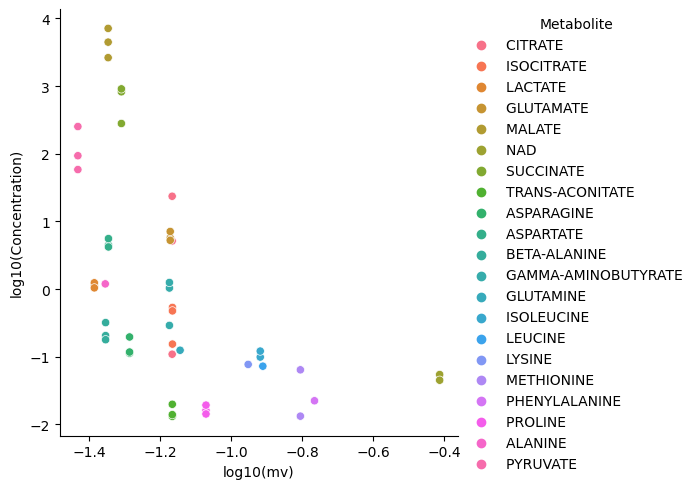

In [157]:
sns.relplot(data = dfi, x = 'log10(mv)', y = 'log10(Concentration)', hue = 'Metabolite')
plt.show()

In [160]:
print(st.pearsonr(dfi['log10(mv)'], dfi['log10(Concentration)']))
print(st.spearmanr(dfi['log10(mv)'], dfi['log10(Concentration)']))

PearsonRResult(statistic=-0.547655467756489, pvalue=3.851299989650381e-05)
SignificanceResult(statistic=-0.7021523147506984, pvalue=1.3302088157828758e-08)
